## K Nearest Neighbors (KNN)

Goal: given a query data point $q$, find $k$ nearest neighbors in the training set to the query point. We can define the K nearest neighborhood to the query point as $N_K(q, D)$, where $D$ is the training dataset.

For KNN classifier, we take the majority vote of the K nearest neighbors to determine the output label: $y_q = \mathrm{majority\_vote}\{y_i\},~\mathrm{where}~i \in N_K(q,D)$

For KNN regressor, we take the average of the K nearest neighbors to determine the output value: $y_q = \frac{1}{K}\sum_{i \in N_K(q,D)} y_i$


Let's look at the python implementation!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
class KNN():
    
    def __init__(self, K):
        self.K = K

    def euclidean_distance(self, x1, x2):
        dist = 0
        for i in range(len(x1)):
            dist += np.power((x1[i] - x2[i]), 2)
        return np.sqrt(dist)
    
    def knn_search(self, X_train, y_train, Q):
        y_pred = np.empty(Q.shape[0])        

        for i, query in enumerate(Q):
            #get K nearest neighbors to query point
            idx = np.argsort([self.euclidean_distance(query, x) for x in X_train])[:self.K]            
            #extract the labels of KNN training labels
            knn_labels = np.array([y_train[i] for i in idx])
            #label query sample as the average of knn_labels
            y_pred[i] = np.mean(knn_labels)

        return y_pred 


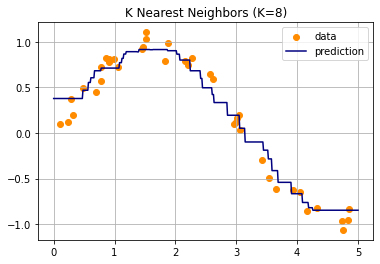

In [3]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y += 0.1*np.random.randn(len(y)) #add noise
T = np.linspace(0, 5, 500)[:, np.newaxis]

K = 8
knn = KNN(K)    
y_pred = knn.knn_search(X, y, T)

plt.figure()
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_pred, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title('K Nearest Neighbors (K=%d)'% K)
plt.grid(True)
plt.show()

In the figure above, the output of KNN regressor is the average of K labels that are closest to the query point(s).